In [ ]:
%run dataset-instance.ipynb

censys_df = censys_df.drop("host_identifier", "snapshot_date", "ipv6_int", "year", "month", "day")

info_df = censys_df.filter((array_contains(col("ports_list"), 161) | array_contains(col("ports_list"), 162)))

main_df = info_df.select(
    "ipv4_int",
    "location.country", 
    "location.city",
    "location.continent",
    "operating_system.vendor", 
    "operating_system.version", 
    "services.snmp.versions",
    "services.snmp.engine.engine_time",
    "services.snmp.engine.engine_boots",
    "services.snmp.engine.raw_id",
    "services.snmp.engine.format",
    "autonomous_system.asn",
    "autonomous_system.country_code")

In [ ]:
censys_df.printSchema()

In [19]:
country_code_mapping = {
    'AD': 'AND',
    'AE': 'ARE',
    'AF': 'AFG',
    'AG': 'ATG',
    'AI': 'AIA',
    'AL': 'ALB',
    'AM': 'ARM',
    'AO': 'AGO',
    'AQ': 'ATA',
    'AR': 'ARG',
    'AS': 'ASM',
    'AT': 'AUT',
    'AU': 'AUS',
    'AW': 'ABW',
    'AX': 'ALA',
    'AZ': 'AZE',
    'BA': 'BIH',
    'BB': 'BRB',
    'BD': 'BGD',
    'BE': 'BEL',
    'BF': 'BFA',
    'BG': 'BGR',
    'BH': 'BHR',
    'BI': 'BDI',
    'BJ': 'BEN',
    'BL': 'BLM',
    'BM': 'BMU',
    'BN': 'BRN',
    'BO': 'BOL',
    'BQ': 'BES',
    'BR': 'BRA',
    'BS': 'BHS',
    'BT': 'BTN',
    'BV': 'BVT',
    'BW': 'BWA',
    'BY': 'BLR',
    'BZ': 'BLZ',
    'CA': 'CAN',
    'CC': 'CCK',
    'CD': 'COD',
    'CF': 'CAF',
    'CG': 'COG',
    'CH': 'CHE',
    'CI': 'CIV',
    'CK': 'COK',
    'CL': 'CHL',
    'CM': 'CMR',
    'CN': 'CHN',
    'CO': 'COL',
    'CR': 'CRI',
    'CU': 'CUB',
    'CV': 'CPV',
    'CW': 'CUW',
    'CX': 'CXR',
    'CY': 'CYP',
    'CZ': 'CZE',
    'DE': 'DEU',
    'DJ': 'DJI',
    'DK': 'DNK',
    'DM': 'DMA',
    'DO': 'DOM',
    'DZ': 'DZA',
    'EC': 'ECU',
    'EE': 'EST',
    'EG': 'EGY',
    'EH': 'ESH',
    'ER': 'ERI',
    'ES': 'ESP',
    'ET': 'ETH',
    'FI': 'FIN',
    'FJ': 'FJI',
    'FM': 'FSM',
    'FO': 'FRO',
    'FR': 'FRA',
    'GA': 'GAB',
    'GB': 'GBR',
    'GD': 'GRD',
    'GE': 'GEO',
    'GF': 'GUF',
    'GG': 'GGY',
    'GH': 'GHA',
    'GI': 'GIB',
    'GL': 'GRL',
    'GM': 'GMB',
    'GN': 'GIN',
    'GP': 'GLP',
    'GQ': 'GNQ',
    'GR': 'GRC',
    'GT': 'GTM',
    'GU': 'GUM',
    'GW': 'GNB',
    'GY': 'GUY',
    'HK': 'HKG',
    'HM': 'HMD',
    'HN': 'HND',
    'HR': 'HRV',
    'HT': 'HTI',
    'HU': 'HUN',
    'ID': 'IDN',
    'IE': 'IRL',
    'IL': 'ISR',
    'IM': 'IMN',
    'IN': 'IND',
    'IO': 'IOT',
    'IQ': 'IRQ',
    'IR': 'IRN',
    'IS': 'ISL',
    'IT': 'ITA',
    'JE': 'JEY',
    'JM': 'JAM',
    'JO': 'JOR',
    'JP': 'JPN',
    'KE': 'KEN',
    'KG': 'KGZ',
    'KH': 'KHM',
    'KI': 'KIR',
    'KM': 'COM',
    'KN': 'KNA',
    'KP': 'PRK',
    'KR': 'KOR',
    'KW': 'KWT',
    'KY': 'CYM',
    'KZ': 'KAZ',
    'LA': 'LAO',
    'LB': 'LBN',
    'LC': 'LCA',
    'LI': 'LIE',
    'LK': 'LKA',
    'LR': 'LBR',
    'LS': 'LSO',
    'LT': 'LTU',
    'LU': 'LUX',
    'LV': 'LVA',
    'LY': 'LBY',
    'MA': 'MAR',
    'MC': 'MCO',
    'MD': 'MDA',
    'ME': 'MNE',
    'MF': 'MAF',
    'MG': 'MDG',
    'MH': 'MHL',
    'MK': 'MKD',
    'ML': 'MLI',
    'MM': 'MMR',
    'MN': 'MNG',
    'MO': 'MAC',
    'MP': 'MNP',
    'MQ': 'MTQ',
    'MR': 'MRT',
    'MS': 'MSR',
    'MT': 'MLT',
    'MU': 'MUS',
    'MV': 'MDV',
    'MW': 'MWI',
    'MX': 'MEX',
    'MY': 'MYS',
    'MZ': 'MOZ',
    'NA': 'NAM',
    'NC': 'NCL',
    'NE': 'NER',
    'NF': 'NFK',
    'NG': 'NGA',
    'NI': 'NIC',
    'NL': 'NLD',
    'NO': 'NOR',
    'NP': 'NPL',
    'NR': 'NRU',
    'NU': 'NIU',
    'NZ': 'NZL',
    'OM': 'OMN',
    'PA': 'PAN',
    'PE': 'PER',
    'PF': 'PYF',
    'PG': 'PNG',
    'PH': 'PHL',
    'PK': 'PAK',
    'PL': 'POL',
    'PM': 'SPM',
    'PN': 'PCN',
    'PR': 'PRI',
    'PT': 'PRT',
    'PW': 'PLW',
    'PY': 'PRY',
    'QA': 'QAT',
    'RE': 'REU',
    'RO': 'ROU',
    'RS': 'SRB',
    'RU': 'RUS',
    'RW': 'RWA',
    'SA': 'SAU',
    'SB': 'SLB',
    'SC': 'SYC',
    'SD': 'SDN',
    'SE': 'SWE',
    'SG': 'SGP',
    'SH': 'SHN',
    'SI': 'SVN',
    'SJ': 'SJM',
    'SK': 'SVK',
    'SL': 'SLE',
    'SM': 'SMR',
    'SN': 'SEN',
    'SO': 'SOM',
    'SR': 'SUR',
    'SS': 'SSD',
    'ST': 'STP',
    'SV': 'SLV',
    'SX': 'SXM',
    'SY': 'SYR',
    'SZ': 'SWZ',
    'TC': 'TCA',
    'TD': 'TCD',
    'TF': 'ATF',
    'TG': 'TGO',
    'TH': 'THA',
    'TJ': 'TJK',
    'TK': 'TKL',
    'TL': 'TLS',
    'TM': 'TKM',
    'TN': 'TUN',
    'TO': 'TON',
    'TR': 'TUR',
    'TT': 'TTO',
    'TV': 'TUV',
    'TW': 'TWN',
    'TZ': 'TZA',
    'UA': 'UKR',
    'UG': 'UGA',
    'UM': 'UMI',
    'US': 'USA',
    'UY': 'URY',
    'UZ': 'UZB',
    'VA': 'VAT',
    'VC': 'VCT',
    'VE': 'VEN',
    'VG': 'VGB',
    'VI': 'VIR',
    'VN': 'VNM',
    'VU': 'VUT',
    'WF': 'WLF',
    'WS': 'WSM',
    'YE': 'YEM',
    'YT': 'MYT',
    'ZA': 'ZAF',
    'ZM': 'ZMB',
    'ZW': 'ZWE'
}

In [20]:
country_name_to_iso3 = {
    'Afghanistan': 'AFG',
    'Åland Islands': 'ALA',
    'Albania': 'ALB',
    'Algeria': 'DZA',
    'American Samoa': 'ASM',
    'Andorra': 'AND',
    'Angola': 'AGO',
    'Anguilla': 'AIA',
    'Antarctica': 'ATA',
    'Antigua and Barbuda': 'ATG',
    'Argentina': 'ARG',
    'Armenia': 'ARM',
    'Aruba': 'ABW',
    'Australia': 'AUS',
    'Austria': 'AUT',
    'Azerbaijan': 'AZE',
    'Bahamas': 'BHS',
    'Bahrain': 'BHR',
    'Bangladesh': 'BGD',
    'Barbados': 'BRB',
    'Belarus': 'BLR',
    'Belgium': 'BEL',
    'Belize': 'BLZ',
    'Benin': 'BEN',
    'Bermuda': 'BMU',
    'Bhutan': 'BTN',
    'Bolivia': 'BOL',
    'Ivory Coast': 'CIV',
    'Bonaire, Sint Eustatius and Saba': 'BES',
    'Bosnia and Herzegovina': 'BIH',
    'Botswana': 'BWA',
    'Bouvet Island': 'BVT',
    'Brazil': 'BRA',
    'British Indian Ocean Territory': 'IOT',
    'Brunei Darussalam': 'BRN',
    'Bulgaria': 'BGR',
    'Burkina Faso': 'BFA',
    'Burundi': 'BDI',
    'Cabo Verde': 'CPV',
    'Cambodia': 'KHM',
    'Cameroon': 'CMR',
    'Canada': 'CAN',
    'Cayman Islands': 'CYM',
    'Central African Republic': 'CAF',
    'Chad': 'TCD',
    'Chile': 'CHL',
    'China': 'CHN',
    'Christmas Island': 'CXR',
    'Cocos (Keeling) Islands': 'CCK',
    'Colombia': 'COL',
    'Comoros': 'COM',
    'Republic of the Congo': 'COG',
    'Democratic Republic of the Congo': 'COD',
    'Cook Islands': 'COK',
    'Costa Rica': 'CRI',
    'Croatia': 'HRV',
    'Cuba': 'CUB',
    'Curaçao': 'CUW',
    'Cyprus': 'CYP',
    'Czechia': 'CZE',
    'Denmark': 'DNK',
    'Djibouti': 'DJI',
    'Dominica': 'DMA',
    'Dominican Republic': 'DOM',
    'Ecuador': 'ECU',
    'Egypt': 'EGY',
    'El Salvador': 'SLV',
    'Equatorial Guinea': 'GNQ',
    'Eritrea': 'ERI',
    'Estonia': 'EST',
    'Eswatini': 'SWZ',
    'Ethiopia': 'ETH',
    'Falkland Islands (Malvinas)': 'FLK',
    'Faroe Islands': 'FRO',
    'Fiji': 'FJI',
    'Finland': 'FIN',
    'France': 'FRA',
    'French Guiana': 'GUF',
    'French Polynesia': 'PYF',
    'French Southern Territories': 'ATF',
    'Gabon': 'GAB',
    'Gambia': 'GMB',
    'Georgia': 'GEO',
    'Germany': 'DEU',
    'Ghana': 'GHA',
    'Gibraltar': 'GIB',
    'Greece': 'GRC',
    'Greenland': 'GRL',
    'Grenada': 'GRD',
    'Guadeloupe': 'GLP',
    'Guam': 'GUM',
    'Guatemala': 'GTM',
    'Guernsey': 'GGY',
    'Guinea': 'GIN',
    'Guinea-Bissau': 'GNB',
    'Guyana': 'GUY',
    'Haiti': 'HTI',
    'Heard Island and McDonald Islands': 'HMD',
    'Holy See': 'VAT',
    'Honduras': 'HND',
    'Hong Kong': 'HKG',
    'Hungary': 'HUN',
    'Iceland': 'ISL',
    'India': 'IND',
    'Indonesia': 'IDN',
    'Iran': 'IRN',
    'Iraq': 'IRQ',
    'Ireland': 'IRL',
    'Isle of Man': 'IMN',
    'Israel': 'ISR',
    'Italy': 'ITA',
    'Jamaica': 'JAM',
    'Japan': 'JPN',
    'Jersey': 'JEY',
    'Jordan': 'JOR',
    'Kazakhstan': 'KAZ',
    'Kenya': 'KEN',
    'Kiribati': 'KIR',
    'Korea (Democratic People\'s Republic of)': 'PRK',
    'Korea (Republic of)': 'KOR',
    'Kuwait': 'KWT',
    'Kyrgyzstan': 'KGZ',
    'Lao People\'s Democratic Republic': 'LAO',
    'Latvia': 'LVA',
    'Lebanon': 'LBN',
    'Lesotho': 'LSO',
    'Liberia': 'LBR',
    'Libya': 'LBY',
    'Liechtenstein': 'LIE',
    'Lithuania': 'LTU',
    'Luxembourg': 'LUX',
    'Macao': 'MAC',
    'Madagascar': 'MDG',
    'Malawi': 'MWI',
    'Malaysia': 'MYS',
    'Maldives': 'MDV',
    'Mali': 'MLI',
    'Malta': 'MLT',
    'Marshall Islands': 'MHL',
    'Martinique': 'MTQ',
    'Mauritania': 'MRT',
    'Mauritius': 'MUS',
    'Mayotte': 'MYT',
    'Mexico': 'MEX',
    'Micronesia (Federated States of)': 'FSM',
    'Moldova (Republic of)': 'MDA',
    'Monaco': 'MCO',
    'Mongolia': 'MNG',
    'Montenegro': 'MNE',
    'Montserrat': 'MSR',
    'Morocco': 'MAR',
    'Mozambique': 'MOZ',
    'Myanmar': 'MMR',
    'Namibia': 'NAM',
    'Nauru': 'NRU',
    'Nepal': 'NPL',
    'Netherlands': 'NLD',
    'New Caledonia': 'NCL',
    'New Zealand': 'NZL',
    'Nicaragua': 'NIC',
    'Niger': 'NER',
    'Nigeria': 'NGA',
    'Niue': 'NIU',
    'Norfolk Island': 'NFK',
    'North Macedonia': 'MKD',
    'Northern Mariana Islands': 'MNP',
    'Norway': 'NOR',
    'Oman': 'OMN',
    'Pakistan': 'PAK',
    'Palau': 'PLW',
    'Palestine, State of': 'PSE',
    'Panama': 'PAN',
    'Papua New Guinea': 'PNG',
    'Paraguay': 'PRY',
    'Peru': 'PER',
    'Philippines': 'PHL',
    'Pitcairn': 'PCN',
    'Poland': 'POL',
    'Portugal': 'PRT',
    'Puerto Rico': 'PRI',
    'Qatar': 'QAT',
    'Réunion': 'REU',
    'Romania': 'ROU',
    'Russia': 'RUS',
    'Rwanda': 'RWA',
    'Saint Barthélemy': 'BLM',
    'Saint Helena, Ascension and Tristan da Cunha': 'SHN',
    'Saint Kitts and Nevis': 'KNA',
    'Saint Lucia': 'LCA',
    'Saint Martin (French part)': 'MAF',
    'Saint Pierre and Miquelon': 'SPM',
    'Saint Vincent and the Grenadines': 'VCT',
    'Samoa': 'WSM',
    'San Marino': 'SMR',
    'Sao Tome and Principe': 'STP',
    'Saudi Arabia': 'SAU',
    'Senegal': 'SEN',
    'Serbia': 'SRB',
    'Seychelles': 'SYC',
    'Sierra Leone': 'SLE',
    'Singapore': 'SGP',
    'Sint Maarten (Dutch part)': 'SXM',
    'Slovakia': 'SVK',
    'Slovenia': 'SVN',
    'Solomon Islands': 'SLB',
    'Somalia': 'SOM',
    'South Africa': 'ZAF',
    'South Georgia and the South Sandwich Islands': 'SGS',
    'South Sudan': 'SSD',
    'Spain': 'ESP',
    'Sri Lanka': 'LKA',
    'Sudan': 'SDN',
    'Suriname': 'SUR',
    'Svalbard and Jan Mayen': 'SJM',
    'Vietnam': 'VNM',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'Syrian Arab Republic': 'SYR',
    'Taiwan, Province of China': 'TWN',
    'Tajikistan': 'TJK',
    'Tanzania': 'TZA',
    'Thailand': 'THA',
    'Timor-Leste': 'TLS',
    'Togo': 'TGO',
    'Tokelau': 'TKL',
    'Tonga': 'TON',
    'Trinidad and Tobago': 'TTO',
    'Tunisia': 'TUN',
    'Turkey': 'TUR',
    'Turkmenistan': 'TKM',
    'Turks and Caicos Islands': 'TCA',
    'Tuvalu': 'TUV',
    'Uganda': 'UGA',
    'Ukraine': 'UKR',
    'United Arab Emirates': 'ARE',
    'United Kingdom': 'GBR',
    'United States': 'USA',
    'Uruguay': 'URY',
    'Uzbekistan': 'UZB',
    'Vanuatu': 'VUT',
    'Venezuela': 'VEN',
    'Viet Nam': 'VNM',
    'Wallis and Futuna': 'WLF',
    'Western Sahara': 'ESH',
    'Yemen': 'YEM',
    'Zambia': 'ZMB',
    'Zimbabwe': 'ZWE',
    'South Korea' : 'KOR',
    'North Korea' : 'PRK'
}

In [4]:
working_df = main_df.toPandas()

In [138]:
censys_df.show(10)

+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|            services|  ipv4_int|            location|   autonomous_system|          ports_list|  service_names_list|    operating_system|                 dns|              labels|               whois|
+--------------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|[{22, TCP, SSH, P...|2405182099|{Asia, Hong Kong,...|{64050, BCPL-SG B...|[22, 80, 88, 99, ...|[SSH, HTTP, HTTP,...|{cpe:2.3:o:*:linu...|      {[], [], NULL}|[remote-access, d...|                NULL|
|[{80, TCP, HTTP, ...|3749170758|{Asia, Hong Kong,...|{58453, CMI-INT-H...|           [80, 443]|        [HTTP, HTTP]|{, o, Akamai, NUL...|      {[], [], NULL}|                  []|            

In [139]:
display(info_df.count())

20365278

In [ ]:
engineID_df = working_df[['format', 'raw_id']]
AS_Vendor_Country_df = working_df[['country_code', 'country', 'vendor', 'continent']]
Vendor_Country_df = working_df[['vendor', 'version', 'country']]
SNMP_df = working_df[['engine_time', 'engine_boots', 'raw_id', 'versions']]
EngineId_EngineTime_df = working_df[['ipv4_int', 'raw_id', 'engine_time']]
engineID_analysis_df = working_df[['format', 'raw_id', 'vendor']]

for column in ['format', 'raw_id']:
    engineID_df.loc[:, column] = engineID_df[column].apply(extract_value)

for col in ['versions']:
    SNMP_df.loc[:, col] = SNMP_df[col].apply(extract_list_with_strings)

for col in ['engine_time', 'engine_boots', 'raw_id']:
    SNMP_df.loc[:, col] = SNMP_df[col].apply(extract_value)

for column in ['raw_id', 'engine_time']:
    EngineId_EngineTime_df.loc[:, column] = EngineId_EngineTime_df[column].apply(extract_value)

for column in ['format', 'raw_id']:
    engineID_analysis_df.loc[:, column] = engineID_analysis_df[column].apply(extract_value)

In [7]:
display(EngineId_EngineTime_df.dropna())

,ipv4_int,raw_id,engine_time
0,2633953281,80000009030030f70d3d1e80,730008411.0
1,768016801,800000090300001e7abcc37f,149373988.0
2,1729452095,80000009030000fcbab5a280,19834584.0
3,737973645,800063a28048739799d49c00000001,5434172.0
4,243824377,800063a280f01090fd47f300000001,110317112.0
...,...,...,...
20365273,460915266,8000000903001005caf7c170,159015811.0
20365274,973922793,80000009030070105c719003,97771633.0
20365275,3548125978,8000113d05084ebf1c781433,3400741.0
20365276,1567201431,8000059505fc9114b4523a33,2900540.0


In [8]:
Engine_df = working_df[['ipv4_int', 'raw_id']]

for column in ['raw_id']:
    Engine_df.loc[:, column] = Engine_df[column].apply(extract_value)

display(Engine_df.dropna())

,ipv4_int,raw_id
0,2633953281,80000009030030f70d3d1e80
1,768016801,800000090300001e7abcc37f
2,1729452095,80000009030000fcbab5a280
3,737973645,800063a28048739799d49c00000001
4,243824377,800063a280f01090fd47f300000001
...,...,...
20365273,460915266,8000000903001005caf7c170
20365274,973922793,80000009030070105c719003
20365275,3548125978,8000113d05084ebf1c781433
20365276,1567201431,8000059505fc9114b4523a33


In [9]:
display(AS_Vendor_Country_df.dropna())

,country_code,country,vendor,continent
18,CI,Ivory Coast,Cisco,Africa
41,JO,Jordan,HP,Asia
60,CN,China,Microsoft,Asia
67,VE,Venezuela,Cisco,South America
87,IN,India,MikroTik,Asia
...,...,...,...,...
20365171,FR,France,Cisco,Europe
20365198,FR,France,Zyxel,Europe
20365201,FR,France,HP,Europe
20365211,VN,Vietnam,MikroTik,Asia


In [10]:
display(Vendor_Country_df.dropna())

,vendor,version,country
67,Cisco,12,Venezuela
598,Cisco,15.5(3)S4b,United States
625,FreeBSD,9.2,China
667,Cisco,12,India
1204,Debian,9.0,Germany
...,...,...,...
20364768,Debian,9.0,France
20364885,Debian,10.2,Indonesia
20364922,H3C,7.1.070,China
20364960,Debian,10.2,France


In [11]:
display(engineID_df.dropna())

,format,raw_id
0,mac,80000009030030f70d3d1e80
1,mac,800000090300001e7abcc37f
2,mac,80000009030000fcbab5a280
5,mac,8000000903000014a8295401
6,mac,800000090300001aa2920203
...,...,...
20365273,mac,8000000903001005caf7c170
20365274,mac,80000009030070105c719003
20365275,octets,8000113d05084ebf1c781433
20365276,octets,8000059505fc9114b4523a33


In [12]:
display(SNMP_df.dropna())

,engine_time,engine_boots,raw_id,versions
0,730008411.0,14.0,80000009030030f70d3d1e80,[v3]
1,149373988.0,6.0,800000090300001e7abcc37f,[v3]
2,19834584.0,3.0,80000009030000fcbab5a280,[v3]
3,5434172.0,3.0,800063a28048739799d49c00000001,[v3]
4,110317112.0,1.0,800063a280f01090fd47f300000001,[v3]
...,...,...,...,...
20365273,159015811.0,5.0,8000000903001005caf7c170,[v3]
20365274,97771633.0,4.0,80000009030070105c719003,[v3]
20365275,3400741.0,92.0,8000113d05084ebf1c781433,[v3]
20365276,2900540.0,1.0,8000059505fc9114b4523a33,[v3]


In [141]:
display(engineID_analysis_df[engineID_analysis_df['format'] == 'octets'].dropna())

,format,raw_id,vendor
125,octets,80001adc0556224062517091042406,VMware
2011,octets,8000040e05b8d94df6e27233,Synology
3172,octets,80000b2f058029945ad07233,Microsoft
4257,octets,8000040e05a039eeb104da33,Hikvision
4294,octets,8000040e05e8ada60136f233,Hikvision
...,...,...,...
20360362,octets,8000040e058cc5b4e0197233,microsoft
20361219,octets,800005950570037ec70db633,Microsoft
20363321,octets,80000b2f05b0c2874d08fe33,Hikvision
20363560,octets,8000040e05f46bef5dd0da33,Synology


In [39]:
dataframe_used = SNMP_df.dropna()

versions_to_check = ['v1', 'v2c', 'v3']

def count_versions(version_list, version):
    return version_list.count(version)

version_counts = {}
for version in versions_to_check:
    version_counts[version] = dataframe_used['versions'].apply(lambda x: count_versions(x, version)).sum()

version_amount_df = pd.DataFrame({'Version': list(version_counts.keys()), 'Count': list(version_counts.values())})

total_count = version_amount_df['Count'].sum()

version_amount_df['Percentage (%)'] = (version_amount_df['Count'] / total_count) * 100
version_amount_df['Percentage (%)'] = version_amount_df['Percentage (%)'].round(1)

version_amount_df = version_amount_df.sort_values(by='Count', ascending=False)

display(version_amount_df)

fig = px.pie(version_amount_df, 
             values='Count', 
             names='Version', 
             title='SNMP Versions Distribution',
             hover_data=['Percentage (%)'],
             labels={'Count':'Version Count', 'Percentage (%)':'Percentage'})

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

,Version,Count,Percentage (%)
2,v3,19659212,90.3
1,v2c,1053563,4.8
0,v1,1046211,4.8


In [73]:
def categorize_list(lst):
    if set(lst) == {'v1', 'v2c', 'v3'}:
        return 'V1, V2c and V3'
    elif set(lst) == {'v1'}:
        return 'Only V1'
    elif set(lst) == {'v2c'}:
        return 'Only V2c'
    elif set(lst) == {'v3'}:
        return 'Only V3'
    elif set(lst) == {'v1', 'v2c'}:
        return 'V1 & V2c'
    elif set(lst) == {'v1', 'v3'}:
        return 'V1 and V3'
    elif set(lst) == {'v2c', 'v3'}:
        return 'V2c and V3'
    return 'Other'

used = SNMP_df.dropna().copy()
used['category'] = used['versions'].apply(categorize_list)

counts = used['category'].value_counts().reset_index()

counts.columns = ['Category', 'Count']
total_count = counts['Count'].sum()

counts['Percentage (%)'] = (counts['Count'] / total_count) * 100
counts['Percentage (%)'] = counts['Percentage (%)'].round(1)

display(counts)

,Category,Count,Percentage (%)
0,Only V3,18591010,94.6
1,"V1, V2c and V3",1031572,5.2
2,V2c and V3,21991,0.1
3,V1 and V3,14639,0.1


In [72]:
data = engineID_df.dropna()

format_counts = data.groupby(['format']).size().reset_index(name='format_count')

total_count = format_counts['format_count'].sum()

format_counts['Percentage (%)'] = (format_counts['format_count'] / total_count) * 100
format_counts['Percentage (%)'] = format_counts['Percentage (%)'].round(1)

def format_string(s):
    if s.lower() == 'mac':
        return 'MAC'
    elif s.lower() == 'ipv4':
        return 'IPv4'
    elif s.lower() == 'ipv6':
        return 'IPv6'
    else:
        return ' '.join([word.capitalize() for word in s.split()])

format_counts['format'] = format_counts['format'].apply(format_string)

format_counts = format_counts.sort_values(by='format_count', ascending=False)

format_counts.columns = ['Format', 'Format Count', 'Percentage (%)']

display(format_counts)

fig = px.pie(format_counts, 
             values='Format Count', 
             names='Format', 
             title='EngineID Formats Distribution',
             hover_data=['Percentage (%)'],
             labels={'Format Count':'Format Count', 'Percentage (%)':'Percentage'})

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

,Format,Format Count,Percentage (%)
2,MAC,7383941,51.0
3,Octets,5258162,36.3
4,Text,1708703,11.8
0,IPv4,123466,0.9
1,IPv6,2082,0.0


In [69]:
df = AS_Vendor_Country_df.dropna()

df.loc[:, 'vendor'] = df['vendor'].apply(lambda x: x.lower())

continent_vendor_counts = df.groupby(['continent', 'vendor']).size().reset_index(name='continent_count')

continent_vendor_counts = continent_vendor_counts[continent_vendor_counts['continent_count'] >= 10000]

continent_total_counts = df.groupby('continent').size().reset_index(name='total_count')

merged_df = pd.merge(continent_vendor_counts, continent_total_counts, on='continent')

merged_df['ratio'] = merged_df['continent_count'] / merged_df['total_count'] * 100

top_vendors = merged_df.loc[merged_df.groupby('continent')['continent_count'].idxmax()]

top_vendors = top_vendors.sort_values(by='continent')

top_vendors['ratio'] = top_vendors['ratio'].round(1)

top_vendors = top_vendors.sort_values(by='continent_count', ascending=False)

top_vendors.columns = ['Continent', 'Vendor', 'Vendor Count per Continent', 'Device Count (all devices)' , 'Percentage (%)']

fig = px.bar(continent_vendor_counts, x='continent', y='continent_count', color='vendor', title='')

fig.update_xaxes(title_text='Continent')
fig.update_yaxes(title_text='Number of Vendor Devices')

fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        resolution=50
    ),
    legend=dict(
        orientation='h', 
        x=0.18, y=1.2,  
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1, 
        title=''
    )
)

fig.show()

In [174]:
dataframe_used = AS_Vendor_Country_df.dropna()

dataframe_used.loc[:, 'country'] = dataframe_used['country'].apply(lambda x: x.lower())

column_to_count = 'vendor'
column_to_create = 'Vendor_count'
column_to_count2 = 'country'
column_to_create2 = 'Country_count'

country_counts = dataframe_used.groupby([column_to_count, column_to_count2]).size().reset_index(name=column_to_create)

country_counts = country_counts[country_counts[column_to_create] >= 3000]
country_counts = country_counts.sort_values(by=column_to_create, ascending=False)

top_countries = country_counts.groupby(column_to_count2)[column_to_create].sum().reset_index(name=column_to_create2)
top_countries = top_countries.sort_values(by=column_to_create2, ascending=False).head(10)

top_vendors_in_top_countries = pd.merge(country_counts, top_countries, on=column_to_count2)

top_vendors = top_vendors_in_top_countries.loc[top_vendors_in_top_countries.groupby(column_to_count2)[column_to_create].idxmax()]

top_vendors['ratio'] = top_vendors[column_to_create] / top_vendors[column_to_create2] * 100

top_vendors['ratio'] = top_vendors['ratio'].round(1)

top_vendors = top_vendors.sort_values(by='Vendor_count', ascending=False)

top_vendors['country'] = top_vendors['country'].apply(lambda x: x.title())

top_vendors_output = top_vendors[['country', 'vendor', 'Vendor_count', 'ratio']]
top_vendors_output.columns = ['Country', 'Vendor', 'Vendor Count', 'Percentage (%)']

display(top_vendors_output)

,Country,Vendor,Vendor Count,Percentage (%)
0,Brazil,MikroTik,99446,78.7
6,Indonesia,MikroTik,66635,94.3
8,Germany,LANCOM Systems,56340,93.6
10,United States,Cisco,33165,35.7
19,India,MikroTik,32887,62.6
22,Bangladesh,MikroTik,22492,100.0
23,China,MikroTik,20732,27.5
31,Russia,MikroTik,20417,58.7
33,Argentina,MikroTik,17291,48.8
37,Italy,MikroTik,13572,69.0


In [100]:
based_on_asn_df = working_df[['asn', 'country_code', 'vendor']]
df = based_on_asn_df.dropna().copy()

vendor_counts = df.groupby(['asn', 'vendor']).size().reset_index(name='Vendor_count')

top_vendors_per_asn = vendor_counts.loc[vendor_counts.groupby('asn')['Vendor_count'].idxmax()]

asn_device_counts = df.groupby('asn').size().reset_index(name='Total_count')
top_10_asns = asn_device_counts.sort_values(by='Total_count', ascending=False).head(10)

top_vendors_per_asn = top_vendors_per_asn[top_vendors_per_asn['asn'].isin(top_10_asns['asn'])]

top_vendors_per_asn = pd.merge(top_vendors_per_asn, asn_device_counts, on='asn')
top_vendors_per_asn['ratio'] = top_vendors_per_asn['Vendor_count'] / top_vendors_per_asn['Total_count'] * 100

top_vendors_per_asn = pd.merge(top_vendors_per_asn, df[['asn', 'country_code']].drop_duplicates(), on='asn')

top_vendors_per_asn['ratio'] = top_vendors_per_asn['ratio'].round(1)

top_vendors_per_asn = top_vendors_per_asn.sort_values(by='Vendor_count', ascending=False)

top_vendors_per_asn['asn'] = top_vendors_per_asn['asn'].astype(int)

output = top_vendors_per_asn[['asn', 'country_code', 'vendor', 'Vendor_count', 'ratio']]
output.columns = ['AS Number', 'AS Country Code', 'Vendor', 'Vendor Count', 'Percentage (%)']

def capitalize_vendor(vendor_name):
    return vendor_name.title()  

output['Vendor'] = output['Vendor'].apply(capitalize_vendor)

display(output)

/tmp/ipykernel_122/3818288957.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,AS Number,AS Country Code,Vendor,Vendor Count,Percentage (%)
0,3320,DE,Lancom Systems,49562,90.5
2,4134,CN,Mikrotik,16438,37.4
8,8151,MX,Cisco,8306,80.5
6,7303,AR,Cisco,8050,54.9
9,55836,IN,Cisco,6740,85.9
7,7713,ID,Mikrotik,5290,62.6
5,7018,US,Cisco,2767,37.0
3,4766,KR,Hp,2753,22.9
4,4837,CN,H3C,2517,25.8
1,3352,ES,Microsoft,1309,17.8


In [57]:
import requests

vulnerability_df = working_df[['ipv4_int', 'vendor', 'version']]
df = vulnerability_df.dropna().copy()
df = df.head(10000)

df['ipv4_int'] = df['ipv4_int'].astype(int)

def int_to_ipv4(ip_int):
    return '.'.join([str((ip_int >> (i * 8)) & 0xFF) for i in range(3, -1, -1)])

df['ipv4_octet'] = df['ipv4_int'].apply(int_to_ipv4)

def get_vulnerabilities(ip):
    url = f'https://internetdb.shodan.io/{ip}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if 'detail' not in data or data['detail'] != "No information available":
            return data.get('vulns', [])  # Extract 'vulns' field if available
    return None

vulnerabilities = []
vuln_counter = 0  
for ip in df['ipv4_octet']:
    vuln_info = get_vulnerabilities(ip)
    if vuln_info:
        vulnerabilities.append({'ipv4_octet': ip, 'vulnerabilities': vuln_info})
    else:
        vulnerabilities.append({'ipv4_octet': ip, 'vulnerabilities': None})
        vuln_counter += 1  

if vulnerabilities:
    vuln_df = pd.DataFrame(vulnerabilities)
    final_df = pd.merge(df, vuln_df, on='ipv4_octet')
else:
    final_df = df

final_df = final_df[['ipv4_octet', 'vendor', 'version', 'vulnerabilities']]
final_df.columns = ['IP Address', 'Vendor', 'Vendor Software Version', 'List of Vulnerabilities']

display(final_df.dropna().head(10))

print(f"Number of times vulnerabilities were None: {vuln_counter}")

,IP Address,Vendor,Vendor Software Version,List of Vulnerabilities
5,76.181.93.92,Cisco,15.7(3)M6,"[CVE-2016-10735, CVE-2018-20676, CVE-2018-1404..."
7,125.209.108.251,CentOS,7.4.1708,"[CVE-2019-12526, CVE-2020-15810, CVE-2021-3180..."
9,190.171.130.86,Cisco,16.10.1b,"[CVE-2022-20692, CVE-2021-34699, CVE-2020-3221..."
16,218.6.99.175,Debian,4.0,"[CVE-2019-12526, CVE-2020-15810, CVE-2021-3180..."
25,103.143.191.105,Red Hat,7,"[CVE-2019-11072, CVE-2018-19052]"
43,103.143.190.81,Red Hat,7,"[CVE-2019-6111, CVE-2018-15473, CVE-2016-10010..."
77,103.94.96.97,Red Hat,7,"[CVE-2023-51385, CVE-2016-1908, CVE-2023-51767..."
82,81.211.43.233,Cisco,16.6.8,"[CVE-2021-34703, CVE-2022-20718, CVE-2022-2069..."
83,141.101.177.64,Cisco,16.9.2,"[CVE-2022-20692, CVE-2021-34699, CVE-2020-3527..."
88,103.143.116.73,Red Hat,7,"[CVE-2019-11072, CVE-2018-19052]"


Number of times vulnerabilities were None: 8811


In [111]:
total_cve_count = 0

for cve_list in df['List of Vulnerabilities']:
    total_cve_count += len(cve_list)

print(f"Total count of all CVEs across all devices: {total_cve_count}")

Total count of all CVEs across all devices: 46976


In [110]:
df = final_df.dropna()

all_cves = []
for cve_list in df['List of Vulnerabilities']:
    all_cves.extend(cve_list)

# Step 2: Count unique CVEs
unique_cves = set(all_cves)
total_unique_cves = len(unique_cves)

print(f"Total unique CVEs across all devices: {total_unique_cves}")

Total unique CVEs across all devices: 1427


In [99]:
all_cves = []
for cve_list in final_df['List of Vulnerabilities']:
    if isinstance(cve_list, list):
        all_cves.extend(cve_list)

cve_counts = pd.Series(all_cves).value_counts()

top_cves = cve_counts.head(10)

total_cves = cve_counts.sum()

vuln_df = pd.DataFrame(top_cves.reset_index())
vuln_df.columns = ['CVE', 'CVE Count']

vuln_df['Percentage (%)'] = (vuln_df['CVE Count'] / total_cves * 100).round(2)

vuln_df = vuln_df.sort_values(by='CVE Count', ascending=False).reset_index(drop=True)

vuln_df = vuln_df.drop(columns='CVE Count')

display(vuln_df)

,CVE,Percentage (%)
0,CVE-2023-44487,1.20
1,CVE-2019-1761,0.91
2,CVE-2021-34770,0.91
3,CVE-2021-34705,0.91
4,CVE-2021-34767,0.91
5,CVE-2018-0197,0.91
6,CVE-2021-1620,0.91
7,CVE-2019-12660,0.91
8,CVE-2023-20186,0.89
9,CVE-2023-20109,0.89


In [102]:
all_cves = []
for cve_list in final_df['List of Vulnerabilities']:
    if isinstance(cve_list, list):
        all_cves.extend(cve_list)

cve_counts = pd.Series(all_cves).value_counts()

top_cves = cve_counts.head(20)

total_cves = cve_counts.sum()

vuln_df_top = pd.DataFrame(top_cves.reset_index())
vuln_df_top.columns = ['CVE', 'CVE Count']

vuln_df_top['Percentage (%)'] = (vuln_df_top['CVE Count'] / total_cves * 100).round(2)

vuln_df_top = vuln_df_top.sort_values(by='CVE Count', ascending=False).reset_index(drop=True)

print("Top 20 CVE Entries:")
display(vuln_df_top)

Top 20 CVE Entries:


,CVE,CVE Count,Percentage (%)
0,CVE-2023-44487,562,1.20
1,CVE-2019-1761,428,0.91
2,CVE-2021-34770,428,0.91
3,CVE-2021-34705,428,0.91
4,CVE-2021-34767,428,0.91
5,CVE-2018-0197,428,0.91
6,CVE-2021-1620,428,0.91
7,CVE-2019-12660,428,0.91
8,CVE-2023-20186,417,0.89
9,CVE-2023-20109,417,0.89


In [103]:
bottom_cves = cve_counts.tail(20)

vuln_df_bottom = pd.DataFrame(bottom_cves.reset_index())
vuln_df_bottom.columns = ['CVE', 'CVE Count']

vuln_df_bottom['Percentage (%)'] = (vuln_df_bottom['CVE Count'] / total_cves * 100).round(2)

vuln_df_bottom = vuln_df_bottom.sort_values(by='CVE Count', ascending=True).reset_index(drop=True)

print("\nBottom 20 CVE Entries:")
display(vuln_df_bottom)


Bottom 20 CVE Entries:


,CVE,CVE Count,Percentage (%)
0,CVE-2006-1494,1,0.0
1,CVE-2007-2511,1,0.0
2,CVE-2007-1286,1,0.0
3,CVE-2008-0145,1,0.0
4,CVE-2007-1475,1,0.0
5,CVE-2004-0959,1,0.0
6,CVE-2007-1777,1,0.0
7,CVE-2006-1549,1,0.0
8,CVE-2006-4339,1,0.0
9,CVE-2006-0996,1,0.0


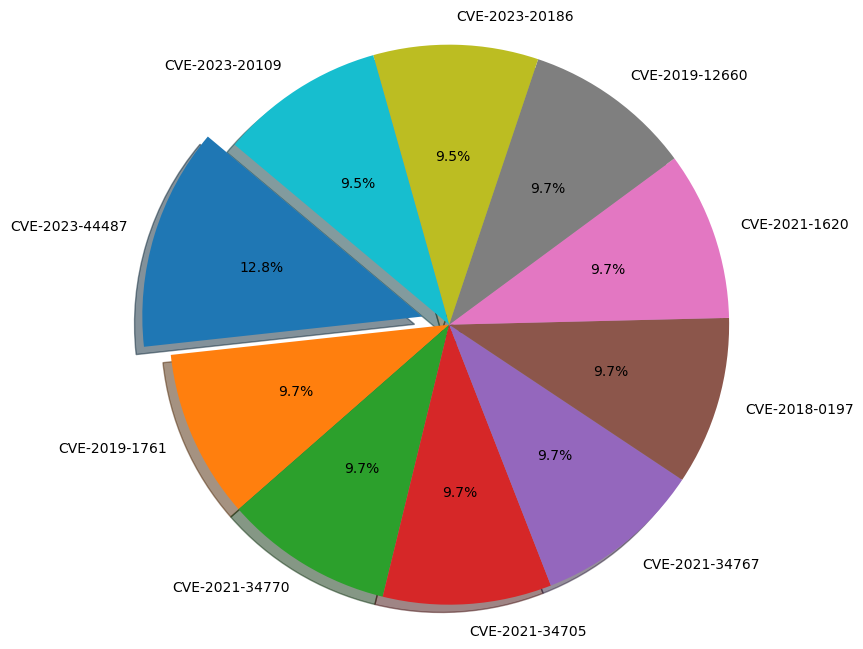

In [104]:
labels = vuln_df['CVE']
sizes = vuln_df['Percentage (%)']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  

plt.title('')
plt.show()

In [54]:
versions_df = working_df[['vendor', 'version']]
df = versions_df.dropna().copy()

vendor_version_counts = df.groupby(['vendor', 'version']).size().reset_index(name='device_count')

top_versions = vendor_version_counts.sort_values(by=['vendor', 'device_count'], ascending=[True, False]) \
                                    .groupby('vendor').first().reset_index()

vendor_totals = vendor_version_counts.groupby('vendor')['device_count'].sum().reset_index()

top_versions = pd.merge(top_versions, vendor_totals, on='vendor', suffixes=('_top', '_total'))

top_versions['ratio_top_to_total'] = (top_versions['device_count_top'] / top_versions['device_count_total']) * 100
top_versions['ratio_top_to_total'] = top_versions['ratio_top_to_total'].round(1)

top_vendors = vendor_totals.nlargest(10, 'device_count').reset_index(drop=True)

top_vendors_details = pd.merge(top_vendors, top_versions, on='vendor')

top_vendors_details = top_vendors_details.sort_values(by='device_count_total', ascending=False)

table_display = top_vendors_details[['vendor', 'version', 'device_count_top', 'ratio_top_to_total']]
table_display.columns = ['Vendor', 'Top Version', 'Device Count', 'Percentage (%)']

table_display['Vendor_Version'] = table_display['Vendor'] + ': ' + table_display['Top Version']

fig = px.pie(table_display, 
             values='Device Count', 
             names='Vendor_Version', 
             title='Top Versions by Device Count for Top Vendors',
             hover_data=['Percentage (%)'],
             labels={'Device Count': 'Device Count', 'Vendor_Version': 'Vendor: Version'})

fig.update_traces(textposition='inside', textinfo='percent')


fig.update_layout(
    legend=dict(
        orientation='v',  
        x=1, y=0.5,  
        xanchor='left',  
        yanchor='middle',  
        bgcolor='rgba(255, 255, 255, 0.5)', 
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1 
    )
)

fig.show()

/tmp/ipykernel_122/2388862727.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
data = AS_Vendor_Country_df.dropna().copy()

display(data)

data.loc[:, 'iso_alpha3'] = data['country'].map(country_name_to_iso3)

data.loc[:, 'vendor'] = data['vendor'].apply(lambda x: x.lower())

vendor_counts = data.groupby('iso_alpha3')['vendor'].size().reset_index(name='VendorCount')

world_map = px.choropleth(
    vendor_counts,
    locations='iso_alpha3',
    locationmode='ISO-3',
    color='VendorCount',
    hover_name='iso_alpha3',
    color_continuous_scale='Viridis',
    range_color=(0, vendor_counts['VendorCount'].max()),  
    labels={'VendorCount': 'Number of SNMP-enabled devices'},
    title='Total Number of SNMP-enabled devices per Country',
    projection='natural earth',  
    scope='world'  
)

world_map.update_layout(
    geo=dict(
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        resolution=50
    ),
    legend=dict(
        orientation='h',  
        x=0.23, y=1.2,  
        bgcolor='rgba(255, 255, 255, 0.5)', 
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1,  
        title=''
    )
)

world_map.show()

,country_code,country,vendor,continent
18,CI,Ivory Coast,Cisco,Africa
41,JO,Jordan,HP,Asia
60,CN,China,Microsoft,Asia
67,VE,Venezuela,Cisco,South America
87,IN,India,MikroTik,Asia
...,...,...,...,...
20365171,FR,France,Cisco,Europe
20365198,FR,France,Zyxel,Europe
20365201,FR,France,HP,Europe
20365211,VN,Vietnam,MikroTik,Asia


In [67]:
data = AS_Vendor_Country_df.dropna().copy()

data.loc[:, 'vendor'] = data['vendor'].apply(lambda x: x.lower())

data['country'] = data['country'].map(country_name_to_iso3)

most_common_vendors = data.groupby('country')['vendor'].agg(lambda x: x.value_counts().index[0]).reset_index()

fig = px.choropleth(
    most_common_vendors,
    locations='country',
    locationmode='ISO-3',
    color='vendor',
    hover_name='vendor',
    title='Most Common Vendor per Country',
    projection='natural earth',
    scope='world'
)

fig.update_geos(
    showcountries=True, 
    countrycolor="Black"
)

fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        resolution=50
    )
)

fig.update_layout(
    legend=dict(
        orientation='v',  
        x=1.02, y=0.5,  
        xanchor='left',  
        yanchor='middle',  
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1,  
        title=''
    )
)

fig.show()

In [13]:
AS_Vendor_Country_df = working_df[['country_code', 'vendor']]

dataframe_used = AS_Vendor_Country_df.dropna()

dataframe_used.loc[:, 'vendor'] = dataframe_used['vendor'].apply(lambda x: x.lower())

column_to_count = 'vendor'

column_to_create = 'Vendor_count'

column_to_count2 = 'country_code'

column_to_create2 = 'CountryCode_count'

vendor_counts = dataframe_used.groupby(['country_code', 'vendor']).size().reset_index(name='count')
vendor_counts = vendor_counts[vendor_counts['count'] >= 40000]
vendor_counts = vendor_counts.sort_values(by='count', ascending=False)

fig = px.bar(vendor_counts, x='country_code', y='count', color='vendor', title='Number of Vendors in Different ASes')

fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        resolution=50
    ),
    legend=dict(
        orientation='h', 
        x=0.23, y=1.2,  
        bgcolor='rgba(255, 255, 255, 0.5)', 
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1, 
        title=''
    )
)

fig.update_xaxes(title_text='AS Country Code')
fig.update_yaxes(title_text='Number of Vendors')

fig.show()

In [66]:
data = AS_Vendor_Country_df.dropna().copy()

data.loc[:, 'iso_alpha3'] = data['country_code'].map(country_code_mapping)

vendor_counts = data.groupby('iso_alpha3')['vendor'].size().reset_index(name='VendorCount')

world_map = px.choropleth(
    vendor_counts,
    locations='iso_alpha3',
    locationmode='ISO-3',
    color='VendorCount',
    hover_name='iso_alpha3',
    color_continuous_scale='Viridis',
    range_color=(0, vendor_counts['VendorCount'].max()),  
    labels={'VendorCount': 'Number of SNMP-enabled devices'},
    title='Total Number of SNMP-enabled devices per AS',
    projection='natural earth', 
    scope='world'  
)

world_map.update_layout(
    geo=dict(
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        resolution=50
    ),
    legend=dict(
        orientation='h',  
        x=0.23, y=1.2, 
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1,  
        title=''
    )
)

world_map.show()

In [38]:
data = AS_Vendor_Country_df.dropna().copy()
data.loc[:, 'vendor'] = data['vendor'].apply(lambda x: x.lower())
data['country_code'] = data['country_code'].map(country_code_mapping)

vendor_counts = data.groupby(['country_code', 'vendor']).size().reset_index(name='count')
vendor_counts = vendor_counts[vendor_counts['count'] >= 10]
vendor_counts = vendor_counts.sort_values(by='count', ascending=False)

most_common_vendors = vendor_counts.groupby('country_code')['vendor'].agg(lambda x: x.value_counts().index[0]).reset_index()

fig = px.choropleth(
    most_common_vendors,
    locations='country_code',
    locationmode='ISO-3',
    color='vendor',
    hover_name='vendor',
    title='Most Common Vendor per AS',
    projection='natural earth', 
    scope='world'  
)

fig.update_geos(
    showcountries=True, 
    countrycolor="Black"
)

fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="lightblue",
        resolution=50
    ),
    legend=dict(
        orientation='v', 
        x=1.02, y=1,  
        xanchor='left', 
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1,  
        title=''
    ),
    margin=dict(r=200)  
)

fig.show()

In [48]:
rfc3411_df = working_df[['format', 'raw_id']]

for column in ['format', 'raw_id']:
    rfc3411_df.loc[:, column] = rfc3411_df[column].apply(extract_value)
    
example = rfc3411_df.dropna().copy()
display(example[example['format'] == 'mac'])

,format,raw_id
0,mac,80000009030030f70d3d1e80
1,mac,800000090300001e7abcc37f
2,mac,80000009030000fcbab5a280
5,mac,8000000903000014a8295401
6,mac,800000090300001aa2920203
...,...,...
20365267,mac,80000009030058bfeafe7d81
20365269,mac,80000009030050f72258a900
20365273,mac,8000000903001005caf7c170
20365274,mac,80000009030070105c719003


In [50]:
def load_oui_data(file_path):
    oui_dict = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) == 2:
                oui_dict[parts[0].lower()] = parts[1]
    return oui_dict

oui_file_path = '/home/ignacy/work/ieee-oui.txt'
oui_mapping = load_oui_data(oui_file_path)

def extract_oui(engine_id):
    if isinstance(engine_id, str) and len(engine_id) >= 14:
        # Extract bytes 5-7 (positions 8-13 in a zero-indexed string)
        oui = engine_id[10:16].lower()
        return oui
    return None

def extract_vendor(oui):
    return oui_mapping.get(oui, 'Unknown Vendor') if oui else 'Invalid EngineID'

df = rfc3411_df[rfc3411_df['format'] == 'mac'].dropna().copy()
df['OUI'] = df['raw_id'].apply(extract_oui)
df['Vendor'] = df['OUI'].apply(extract_vendor)

df_filtered = df[df['Vendor'] != 'Unknown Vendor']

vendor_counts = df_filtered['Vendor'].value_counts().reset_index()
vendor_counts.columns = ['Vendor', 'Count']

vendor_counts = vendor_counts[vendor_counts['Count'] >= 5000]

top_10_vendors = vendor_counts.nlargest(10, 'Count')

total_devices = top_10_vendors['Count'].sum()

top_10_vendors['Percentage (%)'] = (top_10_vendors['Count'] / total_devices * 100).round(1)

top_10_vendors.columns = ['Vendor determined from the OUI', 'Number of devices from that Vendor', 'Percentage (%)']

fig = px.pie(top_10_vendors, 
             values='Number of devices from that Vendor', 
             names='Vendor determined from the OUI', 
             title='Top 10 Vendors by Number of Devices',
             hover_data=['Percentage (%)'],
             labels={'Number of devices from that Vendor':'Device Count', 'Percentage (%)':'Percentage'})

fig.update_traces(textposition='inside', textinfo='percent')

fig.update_layout(
    legend=dict(
        orientation='v',  
        x=1, y=0.5,  
        xanchor='left',  
        yanchor='middle',  
        bgcolor='rgba(255, 255, 255, 0.5)',  
        bordercolor='rgba(0, 0, 0, 0.5)',  
        borderwidth=1  
    )
)

fig.show()